In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('seaborn')
cmap = 'tab10'
%matplotlib inline

# Import data and merge for complete dataset

In [2]:
stats2018 = pd.read_csv('/content/drive/Shareddrives/STUDENT-milestone-II/data/worldcup-playerstats2018.csv')
stats2019 = pd.read_csv('/content/drive/Shareddrives/STUDENT-milestone-II/data/worldcup-playerstats2019.csv')
stats2020 = pd.read_csv('/content/drive/Shareddrives/STUDENT-milestone-II/data/worldcup-playerstats2020.csv')
stats2021 = pd.read_csv('/content/drive/Shareddrives/STUDENT-milestone-II/data/worldcup-playerstats2021.csv')
stats2022 = pd.read_csv('/content/drive/Shareddrives/STUDENT-milestone-II/data/worldcup-playerstats2022.csv')
rpstats2019 = pd.read_csv('/content/drive/Shareddrives/STUDENT-milestone-II/data/rugbypass-playerstats2019.csv')
rpstats2021 = pd.read_csv('/content/drive/Shareddrives/STUDENT-milestone-II/data/rugbypass-playerstats2021.csv')
rpstats2022 = pd.read_csv('/content/drive/Shareddrives/STUDENT-milestone-II/data/rugbypass-playerstats2022.csv')
awh = pd.read_csv('/content/drive/Shareddrives/STUDENT-milestone-II/data/rugbypass-playerahw2022.csv')

player_dataset = pd.concat([stats2018,stats2019,stats2020,stats2021,stats2022,rpstats2019,rpstats2021,rpstats2022])

In [3]:
player_dataset = player_dataset.rename(columns = {'Unnamed: 0':'name'})
awh = awh.rename(columns = {'Unnamed: 0':'name'})

In [4]:
player_dataset = pd.merge(player_dataset,awh, how='left', on='name')
player_dataset = player_dataset.dropna()

In [5]:
player_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3924 entries, 979 to 9152
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                3924 non-null   object 
 1   position            3924 non-null   object 
 2   team                3924 non-null   object 
 3   year                3924 non-null   int64  
 4   Points              3924 non-null   float64
 5   Tries               3924 non-null   float64
 6   Metres              3924 non-null   float64
 7   Runs                3924 non-null   float64
 8   Defenders Beaten    3924 non-null   float64
 9   Clean Breaks        3924 non-null   float64
 10  Passes              3924 non-null   float64
 11  Try Assists         3924 non-null   float64
 12  Kicks               3924 non-null   float64
 13  Conversion Goals    3924 non-null   float64
 14  Penalty Goals       3924 non-null   float64
 15  Tackles             3924 non-null   float64
 16  Tack

In [6]:
player_dataset = player_dataset.set_index('name')

In [7]:
player_dataset = player_dataset.drop(['Simione Kuruvoli', 'Takayasu Tsuji', 'Bradley Slater',
       'Kabelo Mokoena', 'Janus Venter', 'Raymond Tuputupu', 'Jack Owlett'])

In [8]:
df = player_dataset.reset_index()
df2 = pd.read_csv('/content/drive/Shareddrives/STUDENT-milestone-II/data/player.csv')

In [9]:
df3 = pd.merge(df,df2, how = 'left', on = 'name')

# Cleaning and Dealing with Missing Values

In [10]:
df3.loc[df3['age_x'] == 0, 'age_x'] = df3['age_y']
df3.loc[df3['height_x'] == 0, 'height_x'] = df3['height_y']
df3.loc[df3['weight_x'] == 0, 'weight_x'] = df3['weight_y']

In [11]:
df3 = df3.drop(['age_y', 'height_y', 'weight_y'], axis = 1).set_index('name')

In [12]:
df3.loc['Theodore McFarland','position'] = 'Lock 4'

In [13]:
# df.loc[df.Player=='Ray Allen', ["Pos"]] = 'SG'
lst = ['Duke Nginingini','Daan Van Der Avoird','Isaac Aedo Kailea','Benet Kumeroa','Abraham Pole','Isaac Aedo Kailea','Archer Holz']
for name in lst:
  df3.loc[name,'age_x'] = df3.loc[df3.position == 'Prop']['age_x'].mean().round(0)

df3.loc[(df3.position == 'Fullback') & (pd.isna(df3.age_x)),'age_x'] = df3.loc[df3.position == 'Fullback']['age_x'].mean().round(0)

df3.loc['Ben Finau','age_x'] = df3.loc[df3.position == 'Flanker']['age_x'].mean().round(0)
df3.loc['Tom Hooper','age_x'] = df3.loc[df3.position == 'Lock']['age_x'].mean().round(0)
df3.loc['Lucas Cashmore','age_x'] = df3.loc[df3.position == 'Fly Half']['age_x'].mean().round(0)
df3.loc['Seamus Bardoul','age_x'] = df3.loc[df3.position == 'Inside centre']['age_x'].mean().round(0)
df3.loc['Daniel Maiava','age_x'] = df3.loc[df3.position == 'Lock']['age_x'].mean().round(0)

In [14]:
df3.loc[(df3.position == 'Fullback') & (pd.isna(df3.weight_x)),'weight_x'] = df3.loc[df3.position == 'Fullback']['weight_x'].mean().round(0)
df3.loc[(df3.position == 'Fly half') & (pd.isna(df3.weight_x)),'weight_x'] = df3.loc[df3.position == 'Fly half']['weight_x'].mean().round(0)
df3.loc[(df3.position == 'Loosehead Prop') & (pd.isna(df3.weight_x)),'weight_x'] = df3.loc[df3.position == 'Prop']['weight_x'].mean().round(0)
df3.loc[(df3.position == 'Blindside Flanker') & (pd.isna(df3.weight_x)),'weight_x'] = df3.loc[df3.position == 'Flanker']['weight_x'].mean().round(0)
df3.loc[(df3.position == 'Blindside flanker') & (pd.isna(df3.weight_x)),'weight_x'] = df3.loc[df3.position == 'Flanker']['weight_x'].mean().round(0)
df3.loc['Daan Van Der Avoird','weight_x'] = df3.loc[df3.position == 'Wing']['weight_x'].mean().round(0)
df3.loc['Benet Kumeroa','weight_x'] = df3.loc[df3.position == 'Prop']['weight_x'].mean().round(0)
df3.loc['Seamus Bardoul','weight_x'] = df3.loc[df3.position == 'Inside centre']['weight_x'].mean().round(0)
df3.loc['Daniel Maiava','weight_x'] = df3.loc[df3.position == 'Lock']['weight_x'].mean().round(0)
df3.loc['Lukas Ripley','weight_x'] = df3.loc[df3.position == 'Centre']['weight_x'].mean().round(0)

In [15]:
df3.loc[(df3.position == 'Fullback') & (pd.isna(df3.height_x)),'height_x'] = df3.loc[df3.position == 'Fullback']['height_x'].mean().round(0)

In [16]:
df3.loc[(df3.position == 'Loosehead Prop') & (pd.isna(df3.height_x)),'height_x'] = df3.loc[df3.position == 'Prop']['height_x'].mean().round(0)

In [17]:
df3.loc[(df3.position == 'Blindside Flanker') & (pd.isna(df3.height_x)),'height_x'] = df3.loc[df3.position == 'Flanker']['height_x'].mean().round(0)
df3.loc[(df3.position == 'Blindside flanker') & (pd.isna(df3.height_x)),'height_x'] = df3.loc[df3.position == 'Flanker']['height_x'].mean().round(0)

In [18]:
df3.loc[(df3.position == 'Loose head prop') & (pd.isna(df3.height_x)),'height_x'] = df3.loc[df3.position == 'Prop']['height_x'].mean().round(0)

In [19]:
df3.loc['Daan Van Der Avoird','height_x'] = df3.loc[df3.position == 'Wing']['height_x'].mean().round(0)
df3.loc['Lucas Cashmore','height_x'] = df3.loc[df3.position == 'Fly Half']['height_x'].mean().round(0)
df3.loc['Seamus Bardoul','height_x'] = df3.loc[df3.position == 'Inside centre']['height_x'].mean().round(0)
df3.loc['Daniel Maiava','height_x'] = df3.loc[df3.position == 'Lock']['height_x'].mean().round(0)
df3.loc['Lukas Ripley','height_x'] = df3.loc[df3.position == 'Centre']['height_x'].mean().round(0)

In [20]:
df3.loc[df3.age_x == 2,'age_x'] = 23

In [21]:
df3.loc[df3.age_x == 2,'age_x'] = 23
df3.loc['Mika Kruse','age_x'] = 24
df3.loc['Ryan James','age_x'] = 23
df3.loc['George Barton','age_x'] = 23
# df3.loc[df3.age_x == 43]
# df3['age_x'].max()

In [22]:
df3.loc[pd.isna(df3.height_x)]
player_dataset = df3.rename(columns = {'age_x':'age','weight_x':'weight','height_x':'height'})

# Descriptive Statistics

In [23]:
player_dataset[player_dataset['Points']>=230]

,position,team,year,Points,Tries,Metres,Runs,Defenders Beaten,Clean Breaks,Passes,...,Tackles,Tackles Missed,Turnovers Won,Turnovers Conceded,Penalties Conceded,Yellow Cards,Red Cards,age,weight,height
name,,,,,,,,,,,,,,,,,,,,,
Marcus Smith,Fly half,harlequins,2021,230.0,7.0,333.0,68.0,29.0,13.0,376.0,...,137.0,29.0,5.0,12.0,9.0,2.0,0.0,23.0,82.0,175.0


In [24]:
player_dataset.describe()

,year,Points,Tries,Metres,Runs,Defenders Beaten,Clean Breaks,Passes,Try Assists,Kicks,...,Tackles,Tackles Missed,Turnovers Won,Turnovers Conceded,Penalties Conceded,Yellow Cards,Red Cards,age,weight,height
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,...,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,2020.911532,7.170800,0.886218,60.946817,24.877269,2.615188,1.031705,33.685758,2.431603,5.806188,...,32.497060,4.773204,1.956789,4.025313,2.750959,0.132447,0.020455,28.074150,102.995142,186.391204
std,1.090694,16.012846,1.531625,75.499969,26.207109,4.567086,1.945160,88.769449,3.627948,15.474797,...,32.988651,5.207407,2.645543,4.539750,3.328457,0.408162,0.146889,3.797647,14.378665,8.205161
min,2019.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,11.000000,106.000000
25%,2020.000000,0.000000,0.000000,10.000000,6.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,25.000000,92.000000,182.000000
50%,2021.000000,0.000000,0.000000,34.000000,16.000000,1.000000,0.000000,8.000000,1.000000,0.000000,...,22.000000,3.000000,1.000000,3.000000,2.000000,0.000000,0.000000,28.000000,104.000000,186.000000
75%,2022.000000,10.000000,1.000000,84.000000,36.000000,3.000000,1.000000,24.000000,3.000000,3.000000,...,47.000000,7.000000,3.000000,6.000000,4.000000,0.000000,0.000000,31.000000,113.000000,191.000000
max,2022.000000,230.000000,15.000000,702.000000,237.000000,58.000000,23.000000,1384.000000,36.000000,274.000000,...,279.000000,39.000000,20.000000,38.000000,36.000000,5.000000,2.000000,43.000000,193.000000,210.000000


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Points'}>,
        <AxesSubplot:title={'center':'Tries'}>,
        <AxesSubplot:title={'center':'Metres'}>,
        <AxesSubplot:title={'center':'Runs'}>],
       [<AxesSubplot:title={'center':'Defenders Beaten'}>,
        <AxesSubplot:title={'center':'Clean Breaks'}>,
        <AxesSubplot:title={'center':'Passes'}>,
        <AxesSubplot:title={'center':'Try Assists'}>,
        <AxesSubplot:title={'center':'Kicks'}>],
       [<AxesSubplot:title={'center':'Conversion Goals'}>,
        <AxesSubplot:title={'center':'Penalty Goals'}>,
        <AxesSubplot:title={'center':'Tackles'}>,
        <AxesSubplot:title={'center':'Tackles Missed'}>,
        <AxesSubplot:title={'center':'Turnovers Won'}>],
       [<AxesSubplot:title={'center':'Turnovers Conceded'}>,
        <AxesSubplot:title={'center':'Penalties Conceded'}>,
        <AxesSubplot:title={'center':'Yellow Cards'}>,
        <AxesSubplot:title={'center':

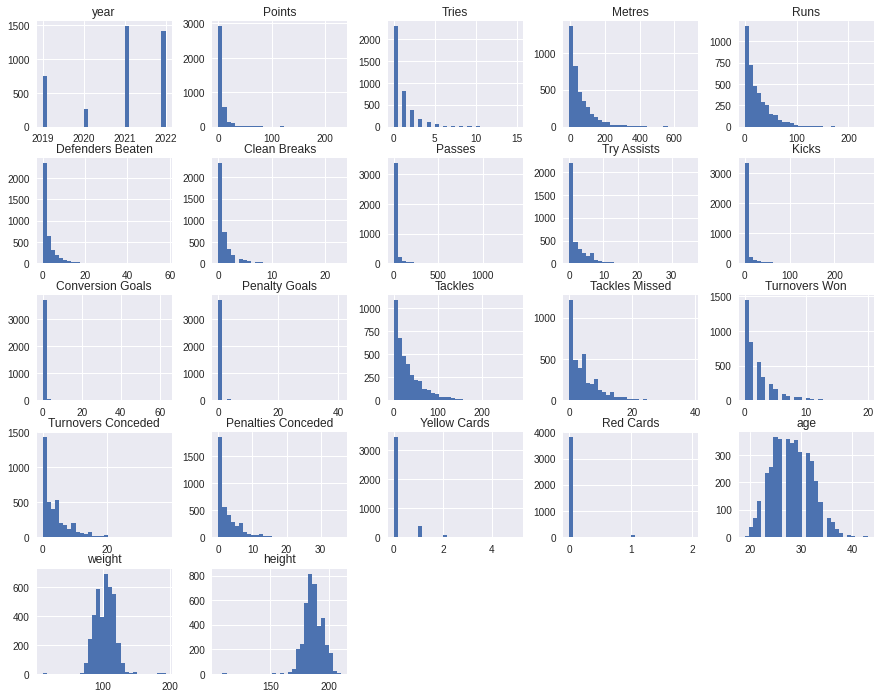

In [25]:
player_dataset.hist(bins=30, figsize=(15, 12))

In [26]:
from sklearn.preprocessing import StandardScaler
feature_names = ['weight','height','Points', 'Tries', 'Metres','Runs', 'Defenders Beaten', 'Clean Breaks', 'Passes', 'Try Assists','Kicks', 'Conversion Goals', 'Penalty Goals', 'Tackles',
       'Tackles Missed', 'Turnovers Won', 'Turnovers Conceded',
       'Penalties Conceded', 'Yellow Cards', 'Red Cards']

# removed age to see if silouhette score changes
df = player_dataset[['position','weight','height', 'Points', 'Tries', 'Metres',
       'Runs', 'Defenders Beaten', 'Clean Breaks', 'Passes', 'Try Assists',
       'Kicks', 'Conversion Goals', 'Penalty Goals', 'Tackles',
       'Tackles Missed', 'Turnovers Won', 'Turnovers Conceded',
       'Penalties Conceded', 'Yellow Cards', 'Red Cards']]


In [27]:
df.head()

,position,weight,height,Points,Tries,Metres,Runs,Defenders Beaten,Clean Breaks,Passes,...,Kicks,Conversion Goals,Penalty Goals,Tackles,Tackles Missed,Turnovers Won,Turnovers Conceded,Penalties Conceded,Yellow Cards,Red Cards
name,,,,,,,,,,,,,,,,,,,,,
Bernard Le Roux,Flanker 6,113.0,196.0,0.0,0.0,35.0,24.0,0.0,1.0,3.0,...,0.0,0.0,0.0,21.0,2.0,1.0,0.0,5.0,0.0,0.0
Charles Ollivon,Number 8,108.0,199.0,5.0,1.0,81.0,20.0,4.0,2.0,6.0,...,0.0,0.0,0.0,31.0,2.0,2.0,3.0,2.0,0.0,0.0
Cyril Baille,Prop,112.0,182.0,0.0,0.0,4.0,6.0,0.0,0.0,1.0,...,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
Demba Bamba,Tighthead Prop,119.0,185.0,0.0,0.0,6.0,4.0,0.0,0.0,1.0,...,0.0,0.0,0.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0
Gregory Alldritt,Flanker 7,115.0,190.0,0.0,0.0,78.0,36.0,1.0,0.0,13.0,...,1.0,0.0,0.0,36.0,0.0,1.0,3.0,2.0,0.0,0.0


## Initial Correlation Review

<AxesSubplot:>

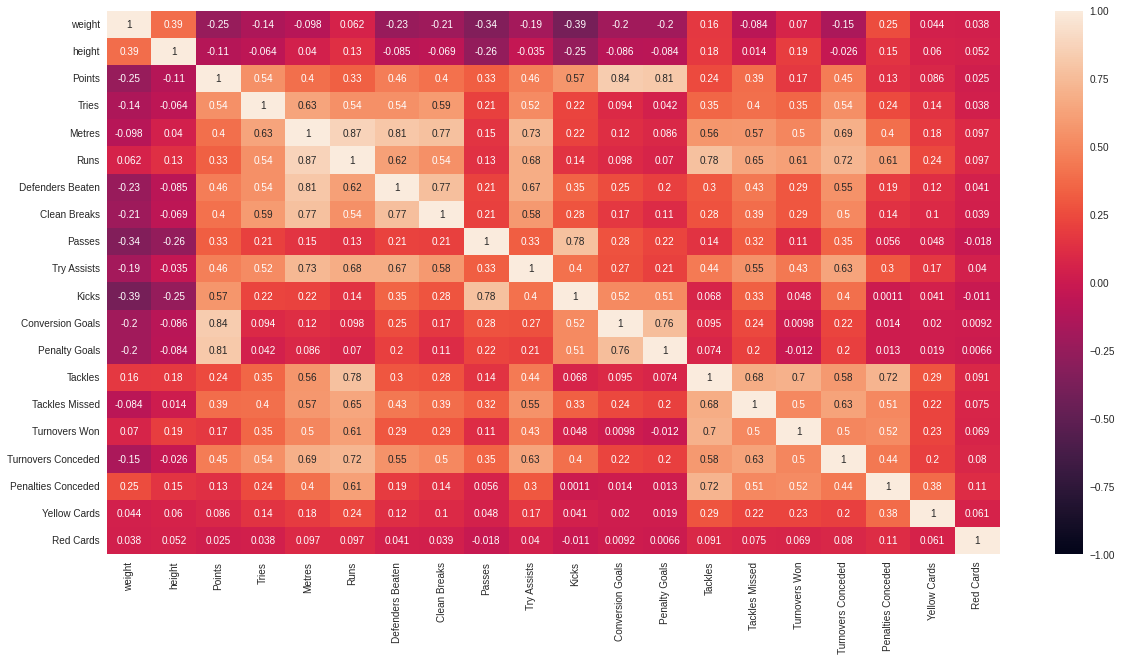

In [28]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [29]:
df = df.groupby(by=['name','position']).mean().drop(columns = ['Penalties Conceded', 'Yellow Cards', 'Red Cards'])
df.head(1)

,,weight,height,Points,Tries,Metres,Runs,Defenders Beaten,Clean Breaks,Passes,Try Assists,Kicks,Conversion Goals,Penalty Goals,Tackles,Tackles Missed,Turnovers Won,Turnovers Conceded
name,position,,,,,,,,,,,,,,,,,
Louis Hillman-Cooper,Fullback,98.0,190.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# PCA for Dimensionality Reduction

In [30]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
normdf = normalizer.fit_transform(df)

In [31]:
from sklearn.decomposition import PCA

pca_results = PCA(random_state=0).fit(normdf)
explained_variance = pca_results.explained_variance_ratio_

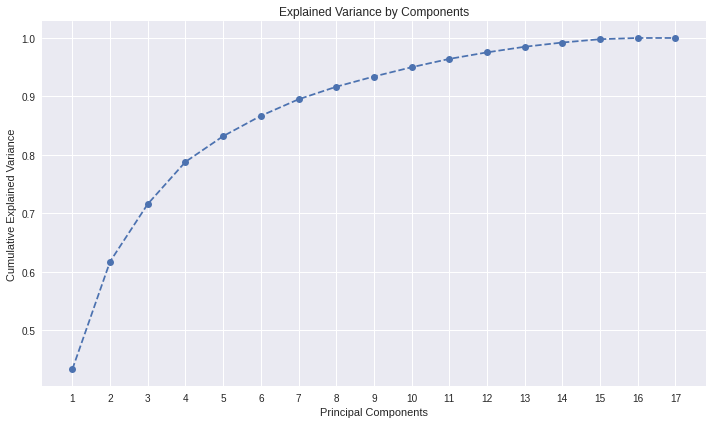

In [32]:
x = len(explained_variance)
plt.figure(figsize=(10,6))
plt.plot(range(1,18), pca_results.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--' )
plt.xticks(np.arange(1,18,1))
plt.title('Explained Variance by Components')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.tight_layout()

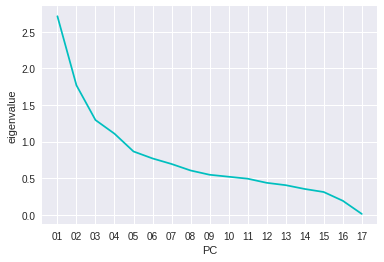

In [33]:
dfpc = pd.DataFrame({'eigenvalue': np.sqrt(pca_results.explained_variance_),
                   'PC':['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17']})
sns.lineplot(x = 'PC',y = "eigenvalue", data = dfpc, color="c");

In [107]:
pca_results = PCA(n_components = 4, random_state=0).fit(normdf)
explained_variance = pca_results.explained_variance_ratio_
pca_scores = pca_results.transform(normdf) # input to kmeans

In [108]:
sum(explained_variance)
# len(feature_names)

0.7879688521483624

In [36]:
len(feature_names)

20

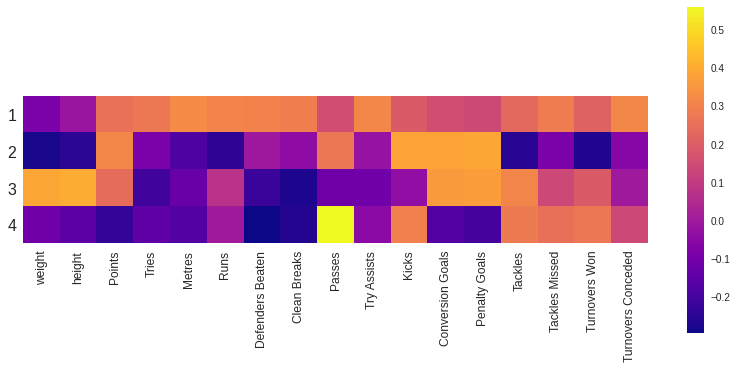

In [37]:
fig, ax = plt.subplots(figsize=(14, 6))
plt.imshow(pca_results.components_[:4], interpolation = 'none', cmap = 'plasma')
plt.xticks(np.arange(-0., len(feature_names[:-3]), 1) , feature_names[:-3], rotation = 90, fontsize=12)
plt.yticks(np.arange(0.,4, 1), ['1','2','3','4'], fontsize = 16)
plt.grid(False)
plt.colorbar()

Heatmap shows the weights of the features in each of the principle components. 

In [38]:
%pip install pca
from pca import pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=1af4989a0e8f82d4b79219320444484a5c77e2628d120b8cc6dd3e35bf955c2c
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [17] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 432x288 with 0 Axes>

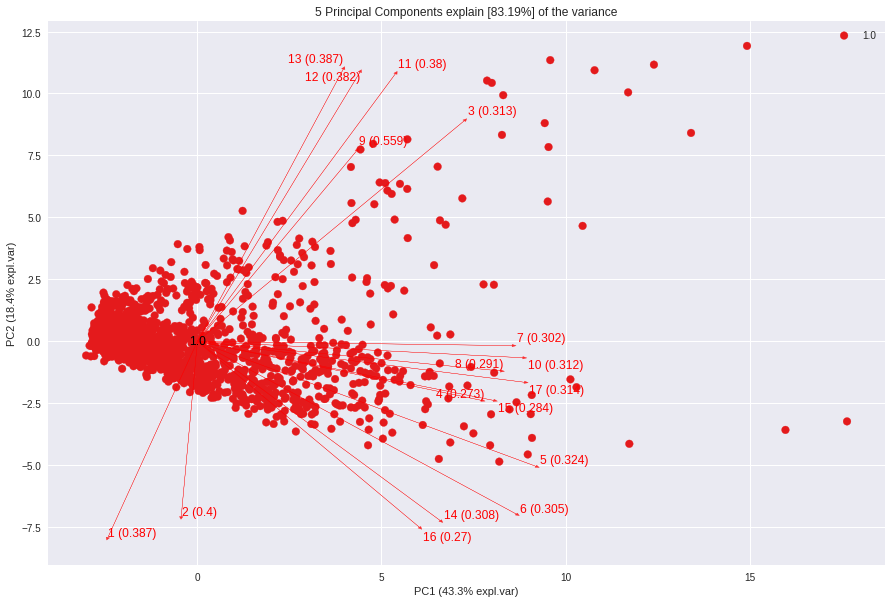

<Figure size 432x288 with 0 Axes>

In [39]:
## Make biplot with the number of features
model= pca(n_components = 5)
results = model.fit_transform(normdf)
fig, ax = model.biplot(n_feat=18)
plt.figure()

In [40]:
pca_results = PCA(n_components =4, random_state=0).fit(normdf)
explained_variance = pca_results.explained_variance_ratio_
X = pca_results.transform(normdf) # input to kmeans

# t-SNE Dimensionality Reduction for Visualization and Exploration of Potential Clusters

In [41]:
from pandas.core.frame import treat_as_nested
from sklearn.manifold import TSNE

In [42]:
def tsne_p(X,p):
  tsne = TSNE(random_state = 42, perplexity = p)
  tsne = tsne.fit_transform(X)

  df_tsne = pd.DataFrame()
  df_tsne['tsne-2d-one'] = tsne[:,0]
  df_tsne['tsne-2d-two'] = tsne[:,1]
  # df_tsne['y'] = tsne.embedding_# get cluster from just PCA
  return df_tsne

In [43]:
df_perplexities = list()
p = list(range(0,120,20))
for i in p:
  print('perplexity:'+str(i))
  df_perplexities.append(tsne_p(X,i))

perplexity:0


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


perplexity:20


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


perplexity:40


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


perplexity:60


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


perplexity:80


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


perplexity:100


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


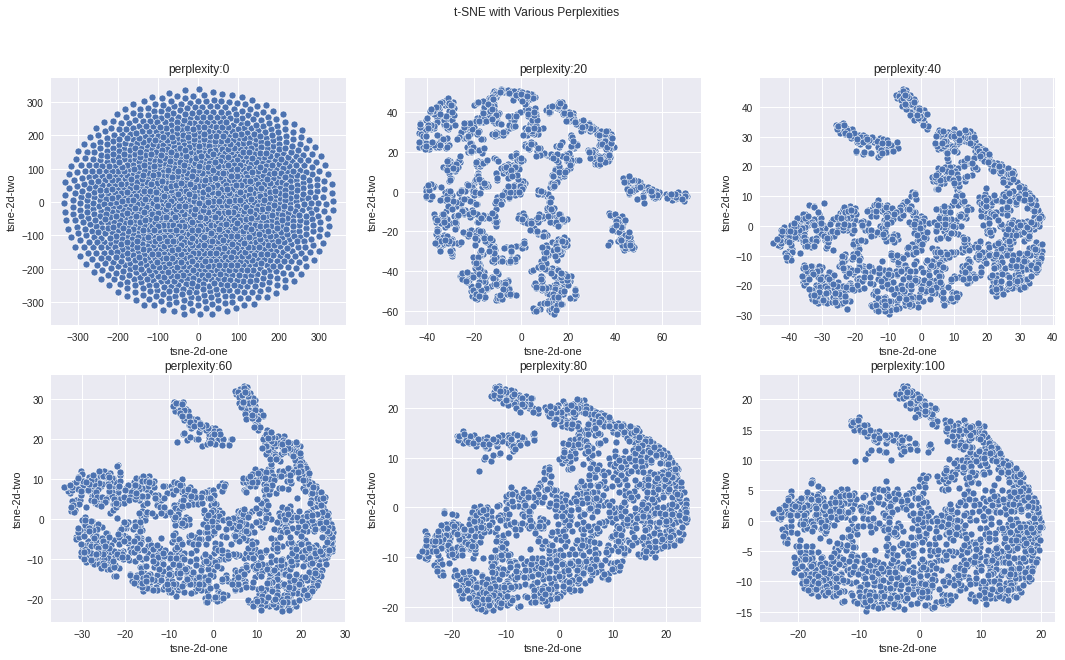

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('t-SNE with Various Perplexities')
 
x = [0,1,2]
y = [0,1]
count = 0

for i in y:
  for j in x:
    sns.scatterplot( ax=axes[i, j],
    x="tsne-2d-one", y="tsne-2d-two",
    # hue="y",
    # palette=sns.color_palette("hls",len(df_perplexities[0]['y'].unique())),
    data=df_perplexities[count],
    # legend="full",
    # alpha=0.3
    )
    axes[i, j].set_title("perplexity:"+str(p[count]))
    count += 1

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


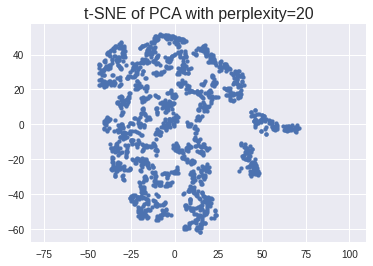

In [45]:
d = tsne_p(X,20)
plt.scatter(x="tsne-2d-one", y="tsne-2d-two", data=d, s = 15)
plt.gca().set_aspect('equal', 'datalim')
plt.title('t-SNE of PCA with perplexity=20', fontsize=16);

# UMAP for Dimensionality Reduction

In [46]:
%pip install umap-learn
import umap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=72186702a5f75e0768d4a543948b91be6ae711d642a5ff298ad614ad010c4dc3
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=e14200d82fb8ef37848b3bd57a4a2f7bd14c74e00eb2cf0574ef18628f78f795
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


Application on Original Normalized Dataset

In [47]:
X_umap_normdf = umap.UMAP(random_state=42, n_neighbors=30,
    min_dist=0.0,
).fit_transform(normdf)

In [48]:
X_umap_normdf.shape

(1557, 2)

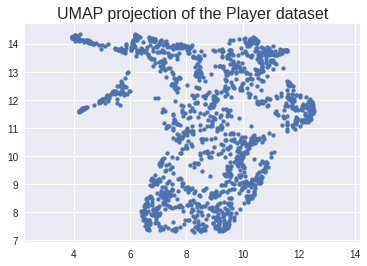

In [49]:
plt.scatter(X_umap_normdf[:, 0], X_umap_normdf[:, 1], s = 15)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Player dataset', fontsize=16);

Application on PCA

In [50]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(X);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)))
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1])
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], s=100)
    plt.title(title, fontsize=18)

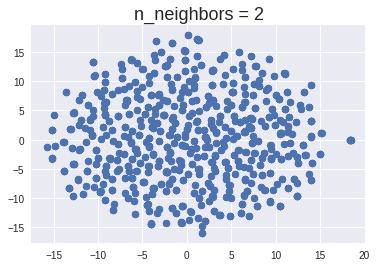

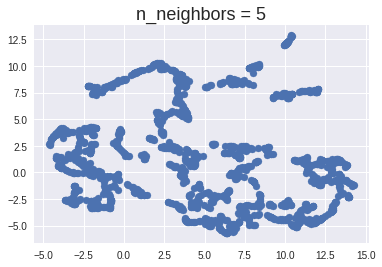

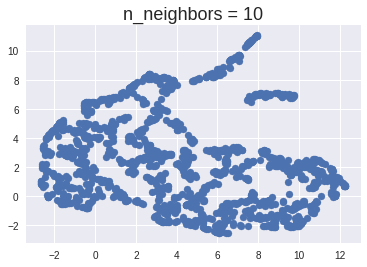

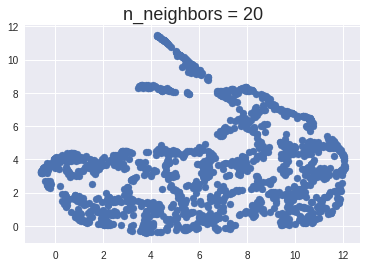

In [51]:
for n in (2, 5, 10, 20):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))
# draw_umap(n_neighbors=50, title='n_neighbors = {}'.format(n))

In [52]:
n = 15
fit = umap.UMAP(n_neighbors=n, min_dist=0.0, random_state = 42)
X_umap_pca = fit.fit_transform(X)

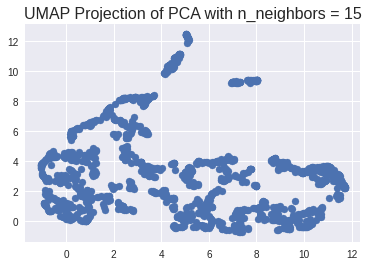

In [53]:
plt.scatter(X_umap_pca[:, 0], X_umap_pca[:, 1])
# plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP Projection of PCA with n_neighbors = '+str(n), fontsize=16);

# K-Means

## First clustering with no Parameter Tuning
Will start with elbow method to determine WCSS using PCA

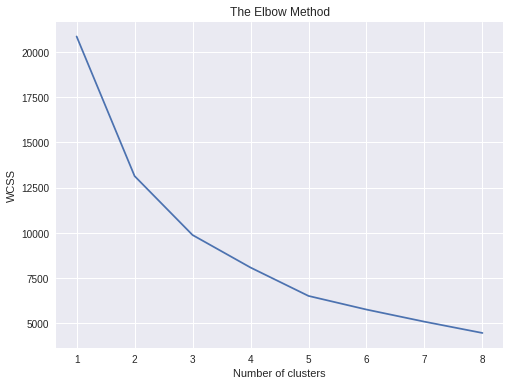

In [54]:
from sklearn.cluster import KMeans
distance=[]
for i in range(1,9):
    kmeans = KMeans(i)
    kmeans.fit(X)
    distance_iter = kmeans.inertia_
    distance.append(distance_iter)

number_clusters = range(1,9)    
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(number_clusters,distance)
ax.set(title='The Elbow Method', 
      xlabel='Number of clusters', 
      ylabel='WCSS');

Elbow method to determine WCSS using UMAP

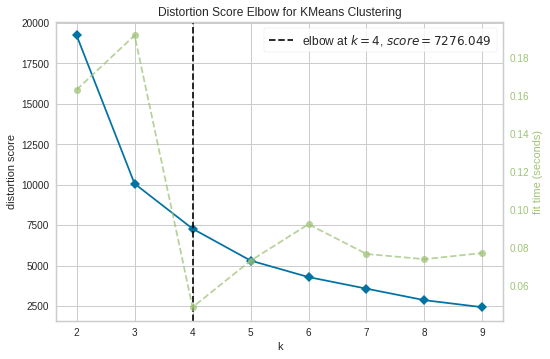

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X_umap_pca)      
visualizer.show()

### calinski and davies scores for cluster selection.

Cluster just on PCA

In [56]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn import metrics

fitted_kmeans = {}
labels_kmeans = {}
df_scores = []
k_values_to_try = np.arange(2, 11)
for n_clusters in k_values_to_try:
    
    #Perform clustering.
    kmeans = KMeans(n_clusters = n_clusters, init='k-means++', max_iter=100, n_init=1, random_state=42)
    labels_clusters = kmeans.fit_predict(X)
    
    #Insert fitted model and calculated cluster labels in dictionaries,
    #for further reference.
    fitted_kmeans[n_clusters] = kmeans
    labels_kmeans[n_clusters] = labels_clusters
    
    #Calculate various scores, and save them for further reference.
    sl = metrics.silhouette_score(X, labels_clusters)
    ch = calinski_harabasz_score(X, labels_clusters)
    db = davies_bouldin_score(X, labels_clusters)
    tmp_scores = {"n_clusters": n_clusters,
                  "silhouette_score": sl,
                  "calinski_harabasz_score": ch,
                  "davies_bouldin_score": db,
                  }
    df_scores.append(tmp_scores)

#Create a DataFrame of clustering scores, using `n_clusters` as index, for easier plotting.
df_scores = pd.DataFrame(df_scores)
df_scores.set_index("n_clusters", inplace=True)
df_scores

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
n_clusters,,,
2,0.482866,912.547534,1.100312
3,0.488537,862.368167,0.913622
4,0.388180,816.798823,1.013434
5,0.418465,852.935849,0.921706
6,0.282177,791.816781,1.064678
7,0.299020,787.922315,0.977910
8,0.302813,761.218352,1.017421
9,0.311198,781.154338,0.960807
10,0.313767,760.142609,0.951687


Cluster on PCA and UMAP Embeddings

In [57]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn import metrics

fitted_kmeans = {}
labels_kmeans = {}
df_scores = []
k_values_to_try = np.arange(2, 10)
for n_clusters in k_values_to_try:
    
    #Perform clustering.
    kmeans = KMeans(n_clusters = n_clusters, random_state=42)
    labels_clusters = kmeans.fit_predict(X_umap_pca)
    
    #Insert fitted model and calculated cluster labels in dictionaries,
    #for further reference.
    fitted_kmeans[n_clusters] = kmeans
    labels_kmeans[n_clusters] = labels_clusters
    
    #Calculate various scores, and save them for further reference.
    sl = metrics.silhouette_score(X_umap_pca, labels_clusters)
    ch = calinski_harabasz_score(X_umap_pca, labels_clusters)
    db = davies_bouldin_score(X_umap_pca, labels_clusters)
    tmp_scores = {"n_clusters": n_clusters,
                  "silhouette_score": sl,
                  "calinski_harabasz_score": ch,
                  "davies_bouldin_score": db,
                  }
    df_scores.append(tmp_scores)

#Create a DataFrame of clustering scores, using `n_clusters` as index, for easier plotting.
df_scores = pd.DataFrame(df_scores)
df_scores.set_index("n_clusters", inplace=True)
df_scores

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
n_clusters,,,
2,0.446105,1405.763719,0.914071
3,0.504650,2050.384966,0.674573
4,0.452935,2086.064761,0.806335
5,0.463306,2287.484980,0.763135
6,0.473250,2337.567678,0.716896
7,0.490462,2388.429878,0.703429
8,0.481380,2610.783248,0.740009
9,0.492722,2726.120084,0.689372


How to use scores: high Silhouette score, hight calinski, and low davies.

### Silhouette Scores Plots

In [58]:
def silhouette_avg(X):
  silhouette_plot = []
  for k in range(2, 11):
      clusters = KMeans(n_clusters=k, random_state=42)
      cluster_labels = clusters.fit_predict(X)
      silhouette_avg = metrics.silhouette_score(X, cluster_labels)
      silhouette_plot.append(silhouette_avg)
  return silhouette_plot

In [59]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def s_score_plots(X,n,silhouette_plot):
  range_n_clusters = n

  for n_clusters in range_n_clusters:
      # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)

      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this example all
      # lie within [-0.1, 1]
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

      # Initialize the clusterer with n_clusters value and a random generator
      # seed of 42 for reproducibility.
      clusterer = KMeans(n_clusters=n_clusters, random_state=42)
      cluster_labels = clusterer.fit_predict(X)

      # The silhouette_score gives the average value for all the samples.
      # This gives a perspective into the density and separation of the formed
      # clusters
      silhouette_avg = silhouette_score(X, cluster_labels)
      print(
          "For n_clusters =",
          n_clusters,
          "The average silhouette_score is :",
          silhouette_avg,
      )

      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples(X, cluster_labels)

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(
              np.arange(y_lower, y_upper),
              0,
              ith_cluster_silhouette_values,
              facecolor=color,
              edgecolor=color,
              alpha=0.7,
          )

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
      ax2.scatter(
          X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
      )

      # Labeling the clusters
      centers = clusterer.cluster_centers_
      # Draw white circles at cluster centers
      ax2.scatter(
          centers[:, 0],
          centers[:, 1],
          marker="o",
          c="white",
          alpha=1,
          s=200,
          edgecolor="k",
      )

      for i, c in enumerate(centers):
          ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

      ax2.set_title("The visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")

      plt.suptitle(
          "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
          % n_clusters,
          fontsize=14,
          fontweight="bold",
      )

  plt.show()

In [60]:
# silhouette_plot = silhouette_avg(X)
# s_score_plots(X,[3,4,5],silhouette_plot)

For n_clusters = 4 The average silhouette_score is : 0.4529347
For n_clusters = 7 The average silhouette_score is : 0.4904619
For n_clusters = 9 The average silhouette_score is : 0.49272218
For n_clusters = 10 The average silhouette_score is : 0.5139625


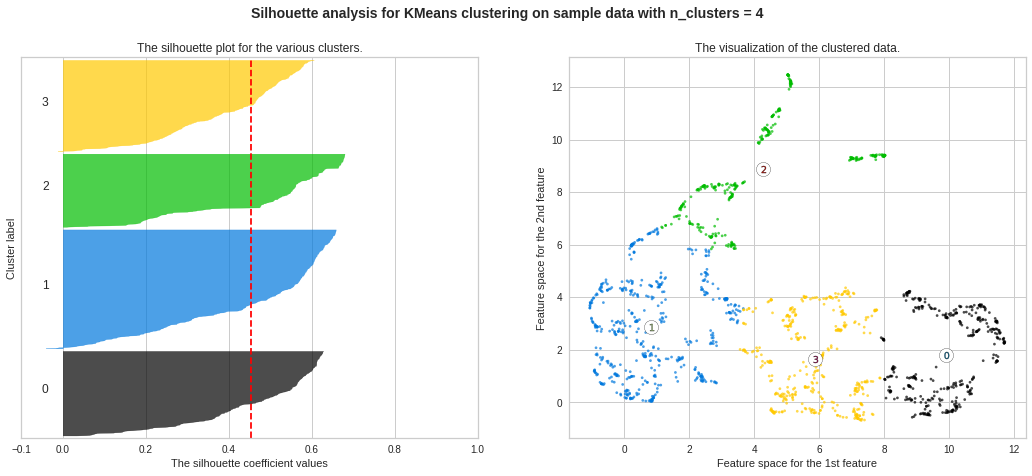

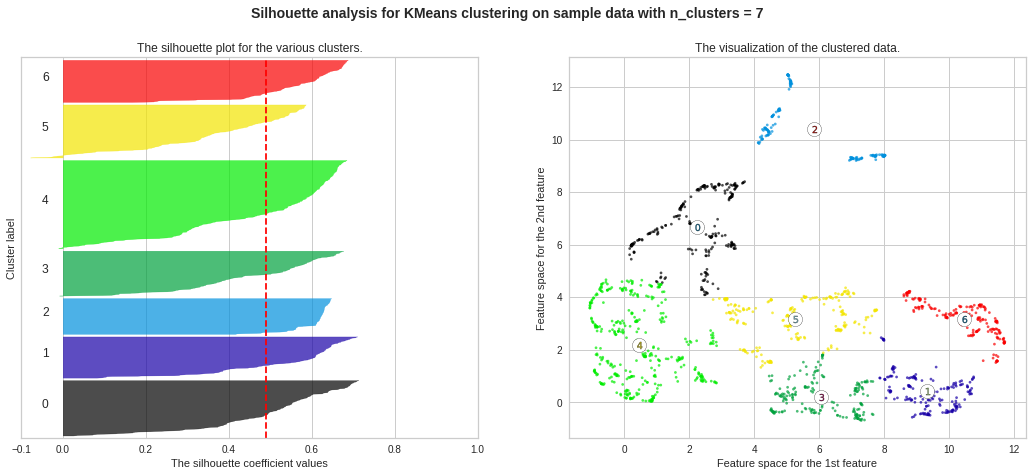

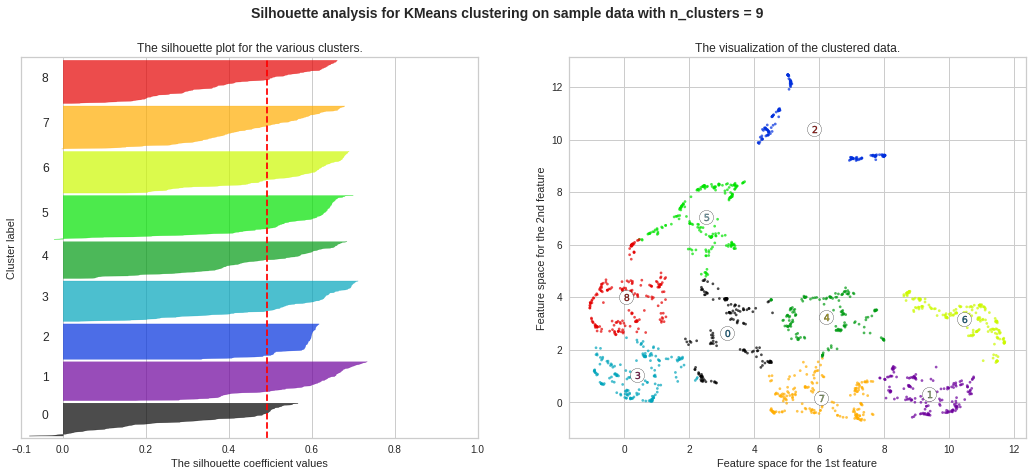

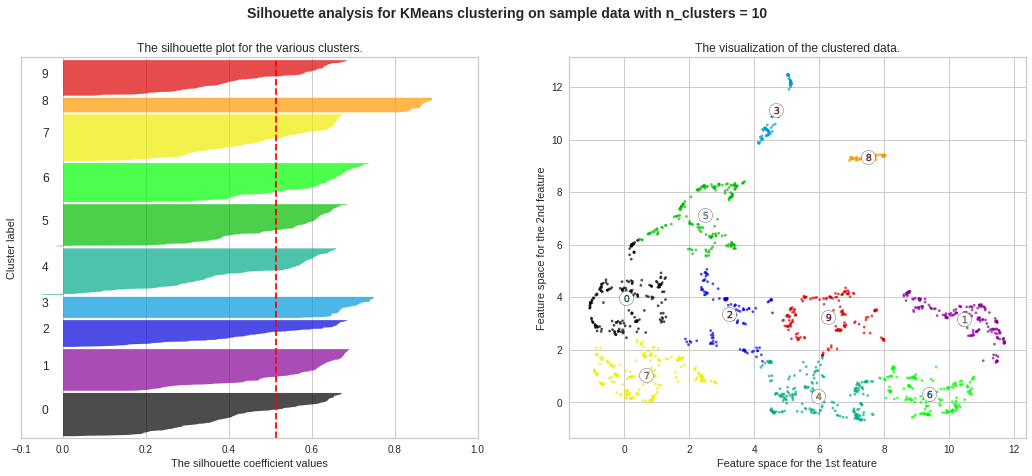

In [61]:
silhouette_plot = silhouette_avg(X_umap_pca)
s_score_plots(X_umap_pca,[4,7,9,10],silhouette_plot)

## Hyperparemeter Tuning

PCA

In [62]:
from sklearn.model_selection import GridSearchCV
def my_silhouette_score(model, X, y=None):
    preds = model.fit_predict(X)
    return silhouette_score(X, preds) if len(set(preds)) > 1 else float('nan')

model = KMeans()
pgrid = {
    'n_clusters':np.arange(4,6,9),
    'init':['k-means++','random'],
    'max_iter':np.arange(50,1000,200),
    # 'tol':[0.1,0.01,0.001,0.0001,0.00001]
}

gsk = GridSearchCV(model, pgrid, scoring=my_silhouette_score).fit(X)
best_kestimator = gsk.best_estimator_
highest_silhouette_scorek = gsk.score(X)

In [63]:
print(best_kestimator, highest_silhouette_scorek)

KMeans(init='random', max_iter=250, n_clusters=4) 0.38815425466458237


In [64]:
# print("best estimator:"+best_estimator+\n+"score:"+highest_silhouette_score)
gsk_resultsdf = pd.DataFrame(gsk.cv_results_)

UMAP Embeddings

In [65]:
model = KMeans(random_state = 42)
pgrid = {
    'n_clusters': [4,9],
    'init':['k-means++','random'],
    'max_iter':np.arange(50,1000,200),
    # 'tol':[0.1,0.01,0.001,0.0001,0.00001]
}

gsk = GridSearchCV(model, pgrid, scoring=my_silhouette_score).fit(X_umap_pca)
best_kestimator = gsk.best_estimator_
highest_silhouette_scorek = gsk.score(X_umap_pca)

In [66]:
print(best_kestimator,highest_silhouette_scorek)
gsk_resultsdf = pd.DataFrame(gsk.cv_results_)
gsk_resultsdf 

KMeans(max_iter=50, n_clusters=9, random_state=42) 0.49272218


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_init,param_max_iter,param_n_clusters,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.065565,0.020532,0.048853,0.007540,k-means++,50,4,"{'init': 'k-means++', 'max_iter': 50, 'n_clust...",0.468244,0.468622,0.449456,0.474507,0.428953,0.457956,0.016775,11
1,0.175605,0.189920,0.099267,0.070679,k-means++,50,9,"{'init': 'k-means++', 'max_iter': 50, 'n_clust...",0.516748,0.504640,0.510830,0.496855,0.497053,0.505225,0.007764,1
2,0.105807,0.046495,0.518720,0.603209,k-means++,250,4,"{'init': 'k-means++', 'max_iter': 250, 'n_clus...",0.468244,0.468622,0.449456,0.474507,0.428953,0.457956,0.016775,11
3,0.078982,0.003690,0.055710,0.004665,k-means++,250,9,"{'init': 'k-means++', 'max_iter': 250, 'n_clus...",0.516748,0.504640,0.510830,0.496855,0.497053,0.505225,0.007764,1
4,0.049039,0.004535,0.047930,0.008306,k-means++,450,4,"{'init': 'k-means++', 'max_iter': 450, 'n_clus...",0.468244,0.468622,0.449456,0.474507,0.428953,0.457956,0.016775,11
5,0.080143,0.008121,0.057269,0.003808,k-means++,450,9,"{'init': 'k-means++', 'max_iter': 450, 'n_clus...",0.516748,0.504640,0.510830,0.496855,0.497053,0.505225,0.007764,1
6,0.048028,0.005312,0.042361,0.003102,k-means++,650,4,"{'init': 'k-means++', 'max_iter': 650, 'n_clus...",0.468244,0.468622,0.449456,0.474507,0.428953,0.457956,0.016775,11
7,0.085009,0.006994,0.056159,0.003695,k-means++,650,9,"{'init': 'k-means++', 'max_iter': 650, 'n_clus...",0.516748,0.504640,0.510830,0.496855,0.497053,0.505225,0.007764,1
8,0.048127,0.005456,0.043520,0.003557,k-means++,850,4,"{'init': 'k-means++', 'max_iter': 850, 'n_clus...",0.468244,0.468622,0.449456,0.474507,0.428953,0.457956,0.016775,11
9,0.083984,0.008135,0.059389,0.005141,k-means++,850,9,"{'init': 'k-means++', 'max_iter': 850, 'n_clus...",0.516748,0.504640,0.510830,0.496855,0.497053,0.505225,0.007764,1


### k-means after parameter tuning

In [67]:
km = KMeans(max_iter=650, n_clusters=9,random_state=42)
cluster_labels = km.fit_predict(X_umap_pca)
silhouette_score(X_umap_pca,cluster_labels)

0.49272218

Text(0, 0.5, 'Feature space for the 2nd feature')

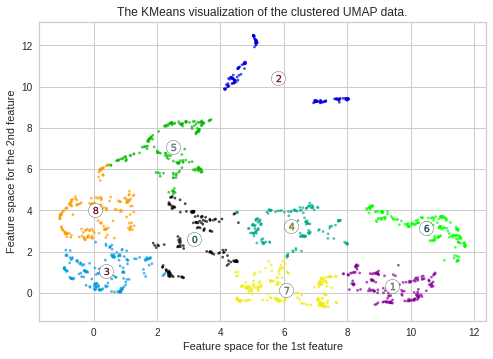

In [68]:
colors = cm.nipy_spectral(cluster_labels.astype(float) / 10)
plt.scatter(
    X_umap_pca[:, 0], X_umap_pca[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
centers = km.cluster_centers_
# Draw white circles at cluster centers
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

plt.title("The KMeans visualization of the clustered UMAP data.")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")

## Player cluster assignment

In [69]:
y_kmeans = km.predict(X_umap_pca)
player_cluster = df.reset_index()

player_cluster['cluster'] = y_kmeans
player_cluster['cluster'].value_counts()

5    191
8    189
7    188
6    182
3    177
1    170
4    161
2    155
0    144
Name: cluster, dtype: int64

In [70]:
# player_cluster[player_cluster.Cluster == 5]

def cluster_stats(player_cluster, cluster):
    # print(player_cluster[feature_names].loc[player_cluster['Cluster'] == cluster].mean())
    return player_cluster[feature_names[:-3]].loc[player_cluster['cluster'] == cluster].mean()

In [71]:
cluster_statsdf = pd.DataFrame()
clusters = np.sort(player_cluster['cluster'].unique())

for i in clusters:
  cluster_statsdf[str(i)] = cluster_stats(player_cluster, i)

In [72]:
player_cluster[player_cluster.cluster == 4]['position'].value_counts()

Wing                 33
Centre               23
Fullback             21
Hooker               21
Prop                  8
Number 8              8
Flanker 7             6
Flanker 6             5
Centre 12             5
Fly half              4
Lock                  4
Centre 13             3
Outside centre        3
Fly Half              2
Openside Flanker      2
Right Wing            2
Loosehead Prop        2
Right wing            2
Scrum half            2
 Hooker               1
Blindside Flanker     1
Left wing             1
Lock 4                1
Left Wing             1
Name: position, dtype: int64

In [73]:
cluster_statsdf

,0,1,2,3,4,5,6,7,8
weight,106.298611,109.517647,86.309677,117.694915,98.428571,86.455497,95.368132,115.106383,107.021164
height,186.638889,190.488235,179.722581,193.785311,184.180124,178.486911,185.038462,192.117021,184.666667
Points,1.435599,5.882003,24.681751,0.324859,4.563753,1.438918,13.127957,2.089539,0.322751
Tries,0.282259,1.172871,0.869754,0.064972,0.897382,0.244328,2.483320,0.417199,0.064550
Metres,22.123413,92.633964,48.507266,9.317797,51.739397,11.118674,155.406096,44.586740,5.636596
Runs,12.028489,47.215518,18.444962,5.820904,19.277507,4.205497,46.714377,25.574113,3.272487
Defenders Beaten,0.656349,2.393866,3.398065,0.167137,2.371976,0.565445,7.987847,0.863032,0.081305
Clean Breaks,0.202629,0.940252,1.181705,0.055556,0.916504,0.210733,3.343433,0.308397,0.014727
Passes,4.687335,19.703964,167.081214,1.640678,10.932062,17.869983,28.058765,8.683029,1.330247
Try Assists,0.797751,3.194104,3.495945,0.214878,2.128986,0.615183,6.001491,1.250469,0.128395


### Cluster Silhouette Scores without PCA

In [74]:
X2 = normdf

In [75]:
silhouette_comparison = pd.DataFrame(
    {   'n_cluster': list(range(2, 11)),
        'PCA': silhouette_avg(X),
        'NoPCA': silhouette_avg(X2)
    }
)

In [76]:
silhouette_comparison.set_index('n_cluster')

,PCA,NoPCA
n_cluster,,
2,0.483537,0.408273
3,0.488537,0.405178
4,0.388597,0.291104
5,0.418635,0.306568
6,0.347422,0.215190
7,0.348227,0.208447
8,0.363357,0.192860
9,0.342844,0.203223
10,0.335072,0.201564


For n_clusters = 2 The average silhouette_score is : 0.48353663871276475
For n_clusters = 3 The average silhouette_score is : 0.48853689050926663
For n_clusters = 5 The average silhouette_score is : 0.4186351752708512


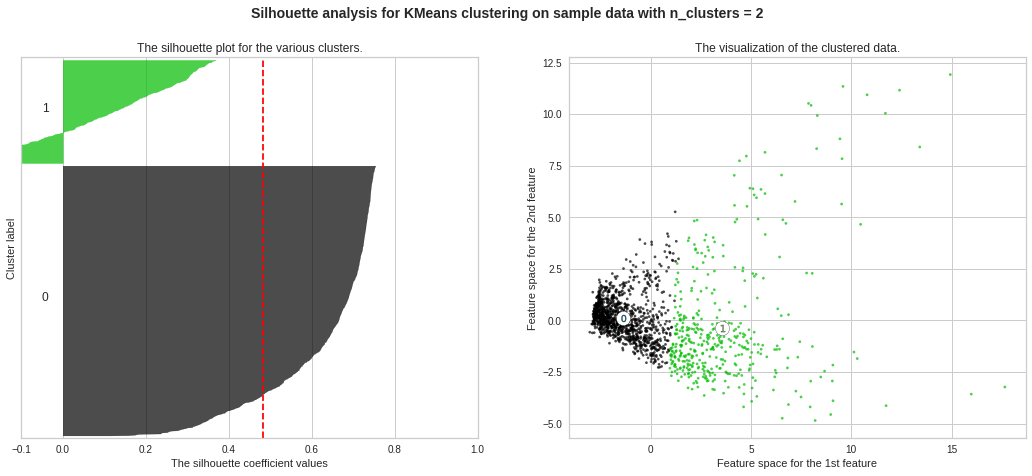

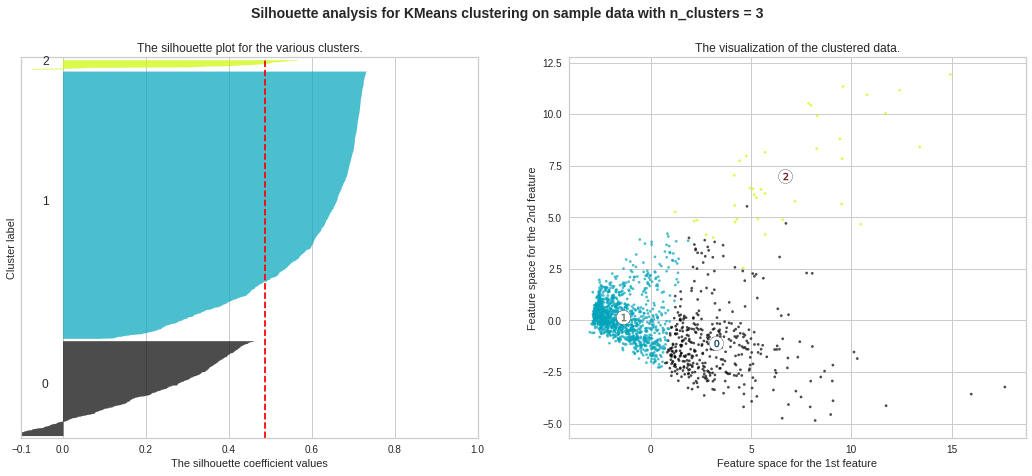

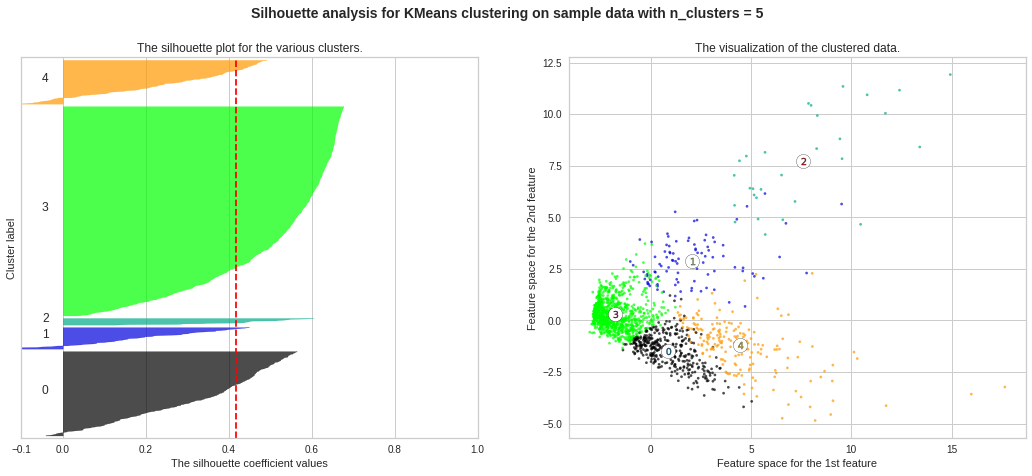

In [77]:
silhouette_plot = silhouette_avg(X)
s_score_plots(X,[2,3,5],silhouette_plot)

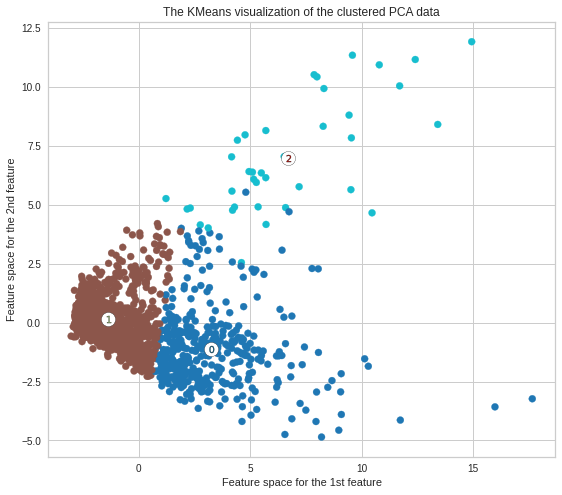

In [78]:
#Predict K-Means cluster membership
km = KMeans(n_clusters=3, random_state=42)
clusters = km.fit_predict(X)

plt.figure(figsize=(20,8))
plt.subplot(121, title='The KMeans visualization of the clustered PCA data')
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.scatter(X[:,0], X[:,1], c=clusters, cmap=cmap)
# Labeling the clusters

centers = km.cluster_centers_
# Draw white circles at cluster centers
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

# DBScan

In [79]:
# from sklearn.cluster import DBSCAN

# fig = plt.figure(figsize=(20, 10))
# fig.subplots_adjust(hspace=.5, wspace=.2)
# i = 1

# for x in range(10, 0, -1):
#     eps = 1/(11-x)
#     db = DBSCAN().fit(X_umap_pca)
#     core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#     core_samples_mask[db.core_sample_indices_] = True
#     labels = db.labels_
    
#     ax = fig.add_subplot(2, 5, i)
#     ax.text(0,8, "eps = {}".format(round(eps, 2)), fontsize=12, ha="center")
#     sns.scatterplot(X_umap_pca[:,0], X_umap_pca[:,1], hue=["cluster-{}".format(x) for x in labels])
    
#     i += 1
    
# plt.savefig("multi_eps.png", dpi=300)

In [80]:
# db = DBSCAN().fit(X_umap_pca)
# labels = db.labels_

# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)

# print("Estimated number of clusters: %d" % n_clusters_)
# print("Estimated number of noise points: %d" % n_noise_)

## Nearest Neighbors

In [81]:
# (2*normdf.shape[1] - 1)

In [82]:
# %pip install kneed
# from kneed import KneeLocator
# from sklearn.neighbors import NearestNeighbors
# nearest_neighbors = NearestNeighbors(n_neighbors=(2*normdf.shape[1] - 1))
# neighbors = nearest_neighbors.fit(X_umap_pca)
# distances, indices = neighbors.kneighbors(X_umap_pca)

# distances = np.sort(distances[:,10], axis=0)
# i = np.arange(len(distances))
# knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

# fig = plt.figure(figsize=(5, 5))
# plt.plot(distances)
# plt.xlabel("Points")
# plt.ylabel("Distance")

# plt.savefig("Distance_curve.png", dpi=300)

In [83]:
# fig = plt.figure(figsize=(5, 5))
# knee.plot_knee()
# plt.xlabel("Points")
# plt.ylabel("Distance")
# plt.savefig("knee.png", dpi=300)
# print(distances[knee.knee])

## DBScan with eps
0.48

In [84]:
# db = DBSCAN(eps=distances[knee.knee], min_samples=5).fit(X_umap_pca)

# labels = db.fit_predict(X_umap_pca)

# fig = plt.figure(figsize=(5, 5))
# sns.scatterplot(X_umap_pca[:,0], X_umap_pca[:,1], hue=["cluster-{}".format(x) for x in labels])
# plt.savefig("dbscan_with_knee.png", dpi=300)

In [85]:
# unique, counts = np.unique(labels, return_counts=True)
# # dict(zip(unique, counts))

Grid search on DBSCAN for parameter tuning

In [86]:
# def my_silhouette_score(model, X, y=None):
#     preds = model.fit_predict(X)
#     return silhouette_score(X, preds) if len(set(preds)) > 1 else float('nan')


# model = DBSCAN()
# pgrid = {
#     'eps': np.linspace(0.01, 0.5, 10),
#     'min_samples': np.arange(2, 10)
# }

# gsdb = GridSearchCV(model, pgrid, scoring=my_silhouette_score).fit(X_umap_pca)
# best_estimatordb = gsdb.best_estimator_
# highest_silhouette_score = gsdb.score(X_umap_pca)

In [87]:
# gsdb_resultsdf = pd.DataFrame(gsdb.cv_results_)

In [88]:
# range_eps = [0.1,0.2,0.3,0.4,0.5]

# for i in range_eps:
#   print('eps value is ' + str(i))
#   model = DBSCAN(eps=i, min_samples=5).fit(X_umap_pca)
#   labels = model.labels_
#   print(set(labels))
#   silhouette_avg = silhouette_score(X_umap_pca,labels)
#   print("Score is: ",silhouette_avg)

In [89]:
# min_samples = list(range(1,11))

# for i in min_samples:
#   print('min_sample value is ' + str(i))
#   model = DBSCAN(eps=0.2, min_samples=i).fit(X_umap_pca)
#   labels = model.labels_
#   print(set(labels))
#   silhouette_avg = silhouette_score(X_umap_pca,labels)
#   print("Score is: ",silhouette_avg)

## Evaluation Scores on DBScan

In [90]:
# fitted_db = {}
# labels_db = {}
# df_scores = []

    
# #Perform clustering.
# db = DBSCAN(min_samples=2).fit(X_umap_pca)
# labels_clusters = db.fit_predict(X_umap_pca)

# #Insert fitted model and calculated cluster labels in dictionaries,
# #for further reference.
# fitted_db[n_clusters] = db
# labels_db[n_clusters] = labels_clusters

# #Calculate various scores, and save them for further reference.
# sl = metrics.silhouette_score(X_umap_pca, labels_clusters)
# ch = calinski_harabasz_score(X_umap_pca, labels_clusters)
# db = davies_bouldin_score(X_umap_pca, labels_clusters)
# tmp_scores = {"n_clusters": len(np.unique(labels_clusters)),
#               "silhouette_score": sl,
#               "calinski_harabasz_score": ch,
#               "davies_bouldin_score": db,
#               }
# df_scores.append(tmp_scores)

# #Create a DataFrame of clustering scores, using `n_clusters` as index, for easier plotting.
# df_scores = pd.DataFrame(df_scores)
# df_scores.set_index("n_clusters", inplace=True)
# df_scores

## DBScan player cluster

In [91]:
# unique, counts = np.unique(labels_clusters, return_counts=True)
# dict(zip(unique, counts))

In [92]:
# # db = DBSCAN(eps=distances[knee.knee], min_samples=4).fit(X)
# # labels_clusters = db.fit_predict(pca)

# player_cluster_dbscan = player_dataset.groupby(by=['name','position']).mean().reset_index()

# player_cluster_dbscan['cluster'] = labels_clusters

# dbcluster_statsdf = pd.DataFrame()
# clusters = [ 0, -1,  1,  2]

# for i in clusters:
#   dbcluster_statsdf[str(i)] = cluster_stats(player_cluster_dbscan,i)

# Agglomerative clustering

In [93]:
from sklearn.cluster import AgglomerativeClustering

Text(0, 0.5, 'umap component 2')

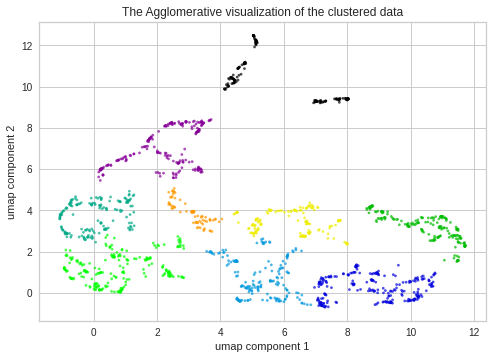

In [94]:
hc = AgglomerativeClustering(n_clusters = 9)
y_hc = hc.fit_predict(X_umap_pca)
colors = cm.nipy_spectral(y_hc.astype(float) / 10)
plt.scatter(
    X_umap_pca[:, 0], X_umap_pca[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

plt.title("The Agglomerative visualization of the clustered data")
plt.xlabel("umap component 1")
plt.ylabel("umap component 2")

In [95]:
def plot_2d_agg_cluster(data, n_clusters, 
                    x_label='umap_comp1', 
                    y_label='umap_comp2',
                    title = 'UMAP projection on vessel dataset with clusters='):
  # train a hierarchial clustering model wit optial num of clusters 
  hc = AgglomerativeClustering(n_clusters = n_clusters)
  y_hc = hc.fit_predict(data)

  # visulizae clusters
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(111)
  colors = cm.nipy_spectral(y_hc.astype(float) / n_clusters)
  # colors = ['#ebac23','#ff9287','#00a76c','#008cf9','#d163e6','#bdbdbd']
  color_to_use = colors[:n_clusters]
  cluster_to_use = range(n_clusters)
  for i,j in zip(cluster_to_use,color_to_use):
    ax.scatter(data[y_hc == i, 0], data[y_hc == i, 1], 
              s = 40 , color = j, label = "Cluster " + str(i))
  ax.set_title(title+'{}'.format(n_clusters)) 
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)

  ax.legend()
  plt.show()
  
  return y_hc

In [96]:
silhouette_score(X_umap_pca,y_hc)

0.47017157

In [97]:
from scipy.cluster.hierarchy import dendrogram, linkage
def plot_truncated_dendrogram(data, p):
  # use dendrogram to find the optimal number of clusters
  plt.figure(figsize=(8,6))
  
  Z1 = linkage(data, 'ward')
  R = dendrogram(Z1, 
                truncate_mode = 'lastp', 
                p = p, 
                show_leaf_counts = False,
                show_contracted=True, # get a distribution impression in truncated branches
            )
  plt.title('Hierarchical Clustering Dendrogram (truncated)', fontsize=14)
  plt.xlabel('Vessels', fontsize=12)
  plt.ylabel('Distance', fontsize=12)
  plt.show()

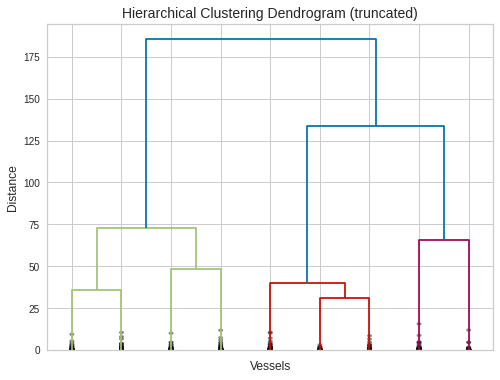

In [98]:
plot_truncated_dendrogram(X_umap_pca,9)

# Plot comparison for results

In [99]:
pca_kmeans = KMeans(init='random', max_iter=450, n_clusters=4)
pca_labels = pca_kmeans.fit_predict(X)
silhouette_avg_pca = metrics.silhouette_score(X, pca_labels)
ch = calinski_harabasz_score(X, pca_labels)
db = davies_bouldin_score(X, pca_labels)
print("PCA KMeans:", silhouette_avg_pca, ch, db)

km = KMeans(max_iter=650, n_clusters=9,random_state=42)
cluster_labels = km.fit_predict(X_umap_pca)
silhouette_avg_umap = silhouette_score(X_umap_pca,cluster_labels)
ch = calinski_harabasz_score(X_umap_pca, labels_clusters)
db = davies_bouldin_score(X_umap_pca, labels_clusters)
print("UMAP KMeans:", silhouette_avg_umap, ch, db)

hc = AgglomerativeClustering(n_clusters = 9)
y_hc = hc.fit_predict(X_umap_pca)
silhouette_avg_hc = silhouette_score(X_umap_pca,y_hc)
ch = calinski_harabasz_score(X_umap_pca, y_hc)
db = davies_bouldin_score(X_umap_pca, y_hc)
print("UMAP Agglomerative:", silhouette_avg_hc, ch, db)

PCA KMeans: 0.38815425466458237 816.8071530372246 1.0140558914068083
UMAP KMeans: 0.49272218 2726.120083827988 0.6893716787769194
UMAP Agglomerative: 0.47017157 2542.427789085067 0.701172656034209


Text(0, 0.5, 'umap component 2')

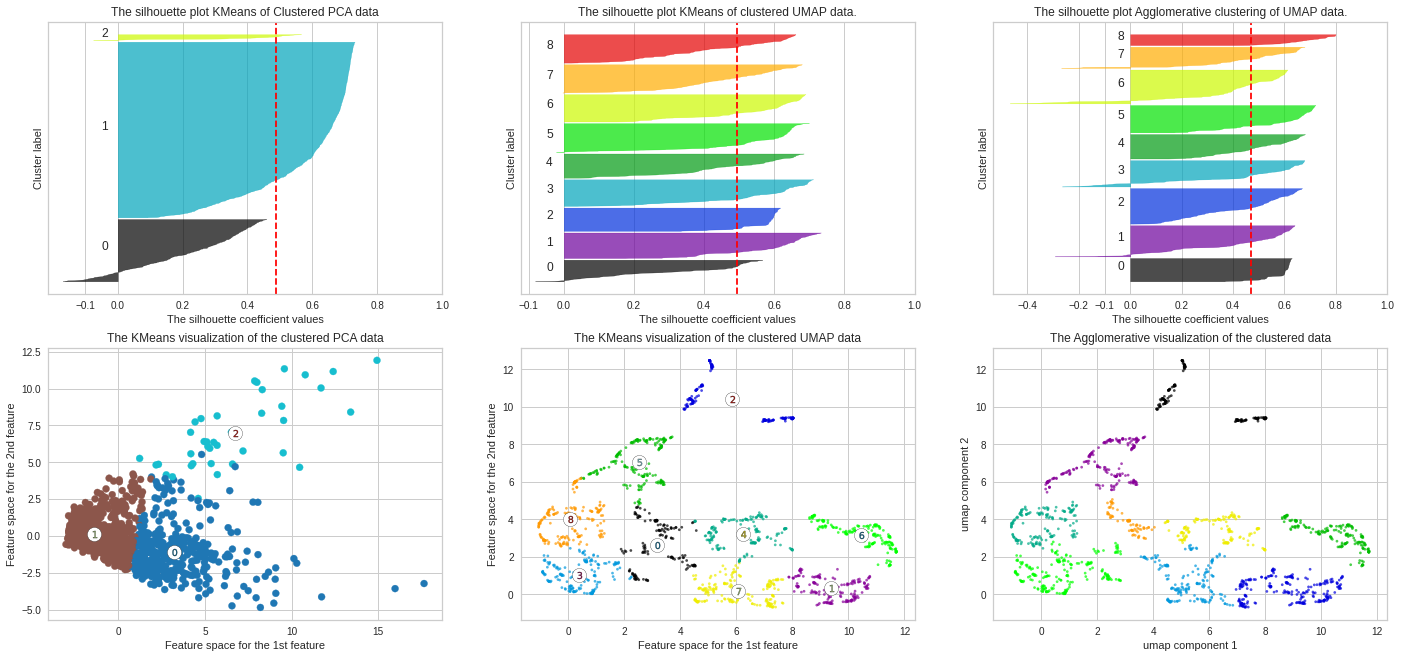

In [100]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(24, 11)

#Predict K-Means cluster membership PCA
n_clusters = 3
km = KMeans(n_clusters=3, random_state=42)
cluster_labels = km.fit_predict(X)

silhouette_avg = silhouette_score(X, cluster_labels)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    axs[0,0].fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    axs[0,0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

axs[0,0].set_title("The silhouette plot KMeans of Clustered PCA data")
axs[0,0].set_xlabel("The silhouette coefficient values")
axs[0,0].set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
axs[0,0].axvline(x=silhouette_avg, color="red", linestyle="--")

axs[0,0].set_yticks([])  # Clear the yaxis labels / ticks
axs[0,0].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


axs[1,0].set_title('The KMeans visualization of the clustered PCA data')
axs[1,0].set_xlabel("Feature space for the 1st feature")
axs[1,0].set_ylabel("Feature space for the 2nd feature")
axs[1,0].scatter(X[:,0], X[:,1], c=clusters, cmap=cmap)
# Labeling the clusters

centers = km.cluster_centers_
# Draw white circles at cluster centers
axs[1,0].scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    axs[1,0].scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")


# KMEAN UMAP
n_clusters = 9
km = KMeans(max_iter=650, n_clusters=9, random_state=42)
cluster_labels = km.fit_predict(X_umap_pca)
colors = cm.nipy_spectral(cluster_labels.astype(float) / 10)

silhouette_avg = silhouette_score(X_umap_pca, cluster_labels)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_umap_pca, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    axs[0,1].fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    axs[0,1].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

axs[0,1].set_title("The silhouette plot KMeans of clustered UMAP data.")
axs[0,1].set_xlabel("The silhouette coefficient values")
axs[0,1].set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
axs[0,1].axvline(x=silhouette_avg, color="red", linestyle="--")

axs[0,1].set_yticks([])  # Clear the yaxis labels / ticks
axs[0,1].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


axs[1,1].scatter(
    X_umap_pca[:, 0], X_umap_pca[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)
# Labeling the clusters
centers = km.cluster_centers_
# Draw white circles at cluster centers
axs[1,1].scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    axs[1,1].scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

axs[1,1].set_title("The KMeans visualization of the clustered UMAP data")
axs[1,1].set_xlabel("Feature space for the 1st feature")
axs[1,1].set_ylabel("Feature space for the 2nd feature")



# Agglomerative Clusters

hc = AgglomerativeClustering(n_clusters = 9)
y_hc = hc.fit_predict(X_umap_pca)
colors = cm.nipy_spectral(y_hc.astype(float) / 10)

silhouette_avg = silhouette_score(X_umap_pca, y_hc)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_umap_pca, y_hc)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[y_hc == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    axs[0,2].fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    axs[0,2].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

axs[0,2].set_title("The silhouette plot Agglomerative clustering of UMAP data.")
axs[0,2].set_xlabel("The silhouette coefficient values")
axs[0,2].set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
axs[0,2].axvline(x=silhouette_avg, color="red", linestyle="--")

axs[0,2].set_yticks([])  # Clear the yaxis labels / ticks
axs[0,2].set_xticks([-0.4,-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
axs[1,2].scatter(
    X_umap_pca[:, 0], X_umap_pca[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

axs[1,2].set_title("The Agglomerative visualization of the clustered data")
axs[1,2].set_xlabel("umap component 1")
axs[1,2].set_ylabel("umap component 2")

# Sensitivity Analysis

In [101]:
model = KMeans(max_iter=650, random_state = 42)
pgrid = {
    # 'n_clusters': [4,9],
    'init':['k-means++','random'],
    # 'max_iter':np.arange(50,1000,200),
    # 'tol':[0.1,0.01,0.001,0.0001,0.00001]
}

gsk = GridSearchCV(model, pgrid, scoring=my_silhouette_score).fit(X_umap_pca)
best_kestimator = gsk.best_estimator_
highest_silhouette_scorek = gsk.score(X_umap_pca)
gsk_resultsdf = pd.DataFrame(gsk.cv_results_)
gsk_resultsdf 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_init,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.080930,0.022772,0.054984,0.004895,k-means++,{'init': 'k-means++'},0.505432,0.483191,0.498853,0.494931,0.464224,0.489326,0.014487,2
1,0.057466,0.005057,0.045493,0.006806,random,{'init': 'random'},0.504428,0.483191,0.496495,0.494931,0.472083,0.490226,0.011330,1


In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
minmaxdf = scaler.fit_transform(df)
pca_results = PCA(n_components =4, random_state=0).fit(minmaxdf)
explained_variance = pca_results.explained_variance_ratio_
X = pca_results.transform(minmaxdf) # input to kmeans
n = 15
fit = umap.UMAP(n_neighbors=n, min_dist=0.0, random_state = 42)
X_umap_pca = fit.fit_transform(X)

In [103]:
n_clusters = 9
km = KMeans(max_iter=650, n_clusters=9, random_state=42)
cluster_labels = km.fit_predict(X_umap_pca)

silhouette_avg = silhouette_score(X_umap_pca, cluster_labels)

In [104]:
silhouette_avg

0.4677595

([<matplotlib.axis.XTick at 0x7f3cfabfef10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

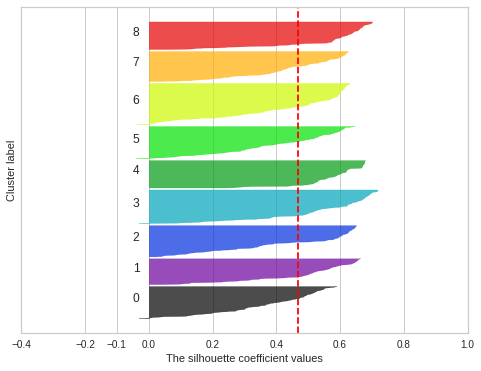

In [105]:
plt.figure(figsize=(8,6))
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_umap_pca, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

# plt.set_title("The silhouette plot Agglomerative clustering of UMAP data.")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.4,-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# plt.scatter(
#     X_umap_pca[:, 0], X_umap_pca[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
# )

# # plt.title("The Agglomerative visualization of the clustered data")
# plt.xlabel("umap component 1")
# plt.ylabel("umap component 2")

Text(0, 0.5, 'umap component 2')

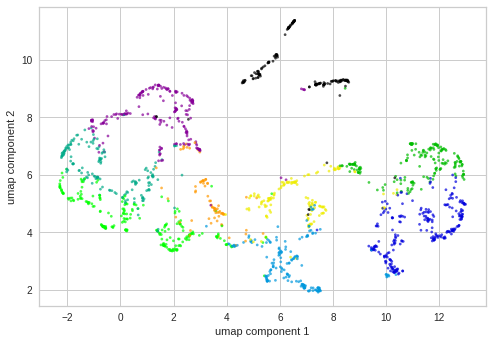

In [106]:
plt.scatter(
    X_umap_pca[:, 0], X_umap_pca[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# plt.title("The Agglomerative visualization of the clustered data")
plt.xlabel("umap component 1")
plt.ylabel("umap component 2")